In [2]:
import pandas as pd
import numpy as np

In [3]:
#Find the correlation between "Blood Pressure systolic" and "Blood Pressure Diastolic"
df = pd.read_excel("HospitalDatabase .xlsx",sheet_name="AmbulatoryVisits")
df[["BloodPressureSystolic","BloodPressureDiastolic"]].corr()

,BloodPressureSystolic,BloodPressureDiastolic
BloodPressureSystolic,1.00000,0.86488
BloodPressureDiastolic,0.86488,1.00000


In [10]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [11]:
import folium

In [43]:
# Generate India Map using Folium
India_map = folium.Map(location=[21.7679,  78.8718], zoom_start=5,tiles='Stamen Terrain')

# display world map
India_map

In [21]:
# Find the maximum expired patients based on Primary Diagnosis
df = pd.read_excel("HospitalDatabase .xlsx",sheet_name="Discharges")
df_DD = df.loc[df.DischargeDisposition == "Expired"]
Max_PD = df_DD['PrimaryDiagnosis'].max()
print('The maximum expired patients - ',Max_PD)

The maximum expired patients -  Stroke


In [37]:
#Connect to sql and  Write a query to get Ambulatory visit record's year

import psycopg2

conn = psycopg2.connect(
   database="HospitalDB_New", user='postgres', password='Andavagx&1', host='::1', port= 5432
)
cursor = conn.cursor()
sql_command = '''Select distinct extract (year from "DateofVisit" ) AS "Year" from public."AmbulatoryVisits"
'''

cursor.execute(sql_command)
print(cursor.fetchall())
conn.commit()
cursor.close()
conn.close()

[(Decimal('2019'),)]


In [31]:
#Get Patients name who have discharged
patient = pd.read_excel("HospitalDatabase .xlsx",sheet_name="Patients")
edunique = pd.read_excel("HospitalDatabase .xlsx",sheet_name="EDUnique")

df_merge = patient[["PatientID","FirstName","LastName"]].merge(edunique[["PatientID","EDDisposition"]],
                                                   on = "PatientID",
                                                   how = "inner")
df_pat = df_merge.loc[(df_merge["EDDisposition"] == "Discharged")]
df_pat

                                            

,PatientID,FirstName,LastName,EDDisposition
1,2,Far,Myers,Discharged
4,5,Tann,Bama,Discharged
5,6,Jerrilyn,Kane,Discharged
6,7,Skipton,Bar,Discharged
19,20,Megan,Walter,Discharged
...,...,...,...,...
883,884,Knox,Dyson,Discharged
884,885,Kellsie,Inc,Discharged
887,888,Rosemonde,Eschalotte,Discharged
892,893,Gail,McGrath,Discharged


C:\Users\priya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ExpectedMortality', ylabel='Density'>

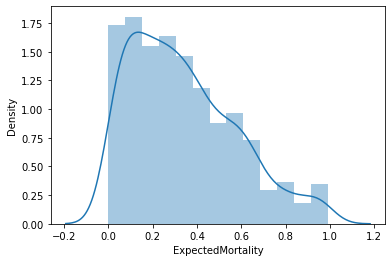

In [46]:
#Plot the distribution curve for LOS
import seaborn as sns 
df = pd.read_excel("HospitalDatabase .xlsx",sheet_name="Discharges")
#df["Los"] = (df["DischargeDate"] - df["AdmissionDate"]).dt.days
sns.distplot(df["ExpectedMortality"], kde = True)

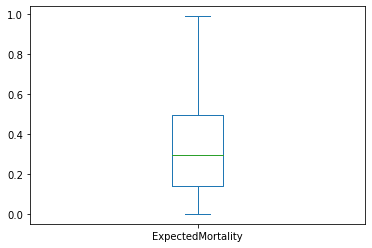

In [52]:
# Create a boxplot for pulse
df = pd.read_excel("HospitalDatabase .xlsx",sheet_name="ReAdmissionRegistry")
df_pulse = pd.DataFrame(data=df['ExpectedMortality'])
df_pulse.plot(kind='box')
plt.show()

In [54]:
#Find the interquartile for Blood Pressure Diastolic
df = pd.read_excel("HospitalDatabase .xlsx",sheet_name="AmbulatoryVisits")
Q1,Q3=df['BloodPressureDiastolic'].quantile(.25),df['BloodPressureDiastolic'].quantile(.75)
IQR=Q3 - Q1
print('The Inter Quartile of Blood Pressure Diastolic:', IQR)

The Inter Quartile of Blood Pressure Diastolic: 35.673929215


In [60]:
#Find out upper bound and lower bound for Blood pressure diastolic and Find out if outliers exist in Blood Pressure Diastolic
upper=Q3+(IQR*1.5)
lower=Q1-(IQR*1.5)

print('Upper Bound:', upper)
print('Lower Bound:', lower)
outliers=(df['BloodPressureDiastolic']<lower) | (df['BloodPressureDiastolic']>upper)
No_outliers = outliers.sum()
print("No of outliers is:",No_outliers)

Upper Bound: 177.2510082975
Lower Bound: 34.555291437499996
No of outliers is: 0


In [63]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [71]:
from wordcloud import WordCloud, STOPWORDS
df = pd.read_excel("HospitalDatabase .xlsx",sheet_name="ReAdmissionRegistry")
stopwords = set(STOPWORDS)


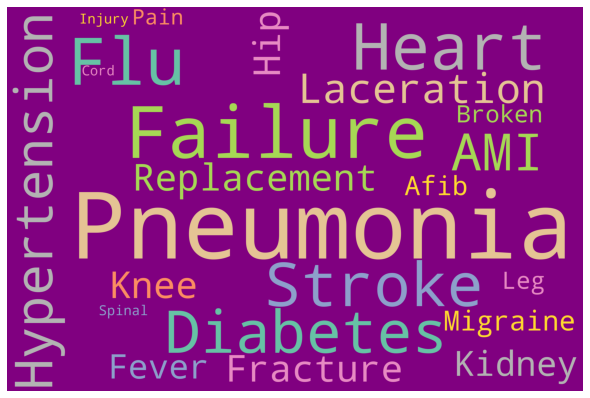

In [79]:
#Create word cloud for Primary diagnosis
from wordcloud import WordCloud, STOPWORDS
df = pd.read_excel("HospitalDatabase .xlsx",sheet_name="ReAdmissionRegistry")
stopwords = set(STOPWORDS)

text = " ".join(cat for cat in df.PrimaryDiagnosis)
 
wordcloud = WordCloud( width=3000,
        height=2000,
        random_state=123,
        background_color="purple",
        colormap="Set2",
        collocations=False,
        stopwords=STOPWORDS,).generate(text)
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()